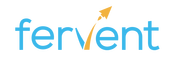
# Calculating Stock Returns - Applied
In this walkthrough, you'll learn how to calculate stock returns from scratch, using Python.

You'll be working with Facebook stock data, stored in a csv file called `fb_price.csv`

In our case, the file is stored in a folder called `data`, which in turn is stored in a master folder called `iapm_python`.

Remember that the return on a stock $j$ is calculated as...
$$r_j = \frac{P_t}{P_{t-1}}-1$$

Where:  
$P_t = $ Price of stock $j$ at time $t$  
$P_{t-1} = $ Price of stock $j$ at time $t-1$

In [2]:
# Import package dependencies
import pandas as pd  # for dealing with data
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for making plots look nicer
sns.set()  # implementing Seaborn's style and themes

<div class="alert alert-block alert-info">
<b>Reading in csv files</b>  

If you're using your own data file instead of the one we provided, make sure to use the full file path.
For example, if the file is stored in your downloads folder, the path with file name would look like this...    
If you're using a Mac:  
"/Users/your_user_name/Downloads/file_name_with_extension"  

<br>
If you're using a PC:  
"C:\Users\your_user_name\Downloads/file_name_with_extension"
</div>


In [3]:
# Load the Facebook price data (Source: Yahoo! Finance)
df = pd.read_csv("fb_price.csv")  # Note that "../" changes the directory to the preceding folder.

<div class="alert alert-block alert-info">
<b>What is "df.head()"?</b>  

df.head() displays the first 5 rows of the dataframe.  
We often use .head() to explore the data we're working with, and get a 'feel' for what we're dealing with.
</div>

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [5]:
# Extract the 'Date' and Adjusted Close ('Adj Close') columns only
df = df[['Date', 'Adj Close']]

In [5]:
df.head()

,Date,Adj Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


<div class="alert alert-block alert-info">
<b>Why bother with renaming columns?</b>  

It's good practice to use the PEP8 naming conventions and styles when writing code. PEP8 standards are viewable here: https://www.python.org/dev/peps/pep-0008/  
This makes your code easily readable by others, as well as yourself in future!  

<br>
Remember that you may well come back to look at your code several months later. By using good variable names, and documenting your code well, you'll make your life easier in future!
</div>

In [8]:
df.rename(columns={'Date' : 'date', 'Adj Close' : 'price_t'}, inplace=True)

In [7]:
df.head()

,date,price_t
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [8]:
# Shift the price_t column by 1 index to obtain price_t-1
df['price_t-1'] = df['price_t'].shift(1)

In [9]:
df.head()

,date,price_t,price_t-1
0,2012-05-18,38.230000,NaN
1,2012-05-21,34.029999,38.230000
2,2012-05-22,31.000000,34.029999
3,2012-05-23,32.000000,31.000000
4,2012-05-24,33.029999,32.000000


In [10]:
# Calculate returns using our standard formula ((P_t / P_t-1) - 1)
df['returns_manual'] = (df['price_t'] / df['price_t-1']) - 1

In [11]:
df.head()

,date,price_t,price_t-1,returns_manual
0,2012-05-18,38.230000,NaN,NaN
1,2012-05-21,34.029999,38.230000,-0.109861
2,2012-05-22,31.000000,34.029999,-0.089039
3,2012-05-23,32.000000,31.000000,0.032258
4,2012-05-24,33.029999,32.000000,0.032187


<div class="alert alert-block alert-info">
<b>What is "df.tail()"?</b>  

df.tail() displays the last 5 rows of the dataframe.  
We often use .tail() to explore the data we're working with, and get a 'feel' for what we're dealing with.
</div>

In [12]:
df.tail()

,date,price_t,price_t-1,returns_manual
1409,2017-12-22,177.199997,177.449997,-0.001409
1410,2017-12-26,175.990005,177.199997,-0.006828
1411,2017-12-27,177.619995,175.990005,0.009262
1412,2017-12-28,177.919998,177.619995,0.001689
1413,2017-12-29,176.460007,177.919998,-0.008206


In [12]:
# Calculate returns using the pct_change() method
df['returns_pct_change_method'] = df['price_t'].pct_change()
df.head()

,date,price_t,returns_pct_change_method
0,2012-05-18,38.230000,NaN
1,2012-05-21,34.029999,-0.109861
2,2012-05-22,31.000000,-0.089039
3,2012-05-23,32.000000,0.032258
4,2012-05-24,33.029999,0.032187


In [10]:
df.head()

,date,price_t,returns_pct_change_method
0,2012-05-18,38.230000,NaN
1,2012-05-21,34.029999,-0.109861
2,2012-05-22,31.000000,-0.089039
3,2012-05-23,32.000000,0.032258
4,2012-05-24,33.029999,0.032187


In [15]:
# Calculate the returns "manually", without creating a separate column for price_t-1
df['returns'] = (df['price_t'] / df['price_t'].shift(1)) - 1

In [16]:
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
0,2012-05-18,38.230000,NaN,NaN,NaN,NaN
1,2012-05-21,34.029999,38.230000,-0.109861,-0.109861,-0.109861
2,2012-05-22,31.000000,34.029999,-0.089039,-0.089039,-0.089039
3,2012-05-23,32.000000,31.000000,0.032258,0.032258,0.032258
4,2012-05-24,33.029999,32.000000,0.032187,0.032187,0.032187


In [17]:
# Set the 'date' column as the index to help ensure dates show up in our plot.
df.set_index('date', inplace=True)

In [18]:
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
date,,,,,
2012-05-18,38.230000,NaN,NaN,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861,-0.109861,-0.109861
2012-05-22,31.000000,34.029999,-0.089039,-0.089039,-0.089039
2012-05-23,32.000000,31.000000,0.032258,0.032258,0.032258
2012-05-24,33.029999,32.000000,0.032187,0.032187,0.032187


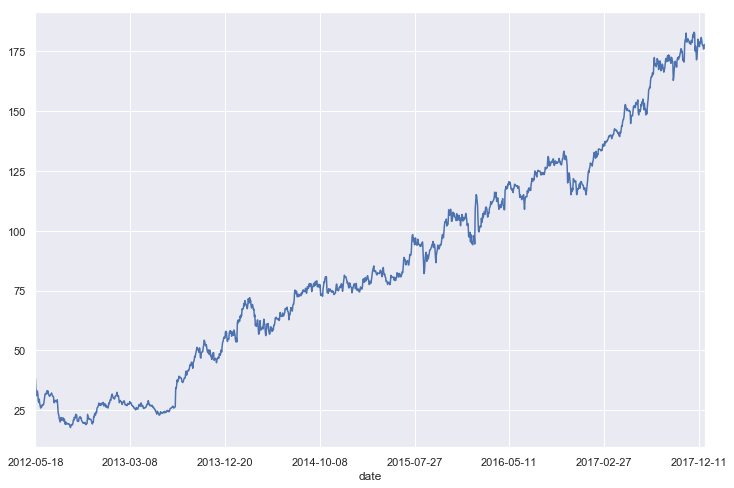

In [19]:
# Plot Facebook's Price data
df['price_t'].plot(figsize=(12, 8))

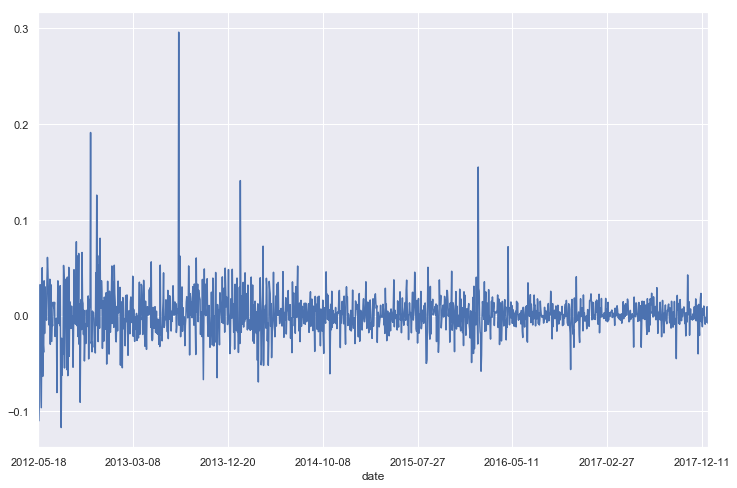

In [20]:
# Plot Facebook's Returns data
df['returns'].plot(figsize=(12, 8))